In [24]:
import pandas as pd
# Viz with Plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly_express as px

In [25]:
df = pd.read_csv("sensus.csv")
dadmean = df['Tinggi badan ayah saya'].mean()
mommean = df['Berat badan ibu saya'].mean()
# df = df['Berat badan ibu saya'].fillna(mommean)
df = df.iloc[:,7:]
df = df.rename({'Unnamed: 7':'jenis_kelamin','Berat badan anda ':'berat',
               'Tinggi badan saya': 'tinggi', 'Umur saya ( Tahun : Bulan )':'umur',
       'Umur Ibu ( Tahun : Bulan )':'umur_ibu', 'Umur Ayah ( Tahun : Bulan )':"umur_ayah",
       'Hobi saya':'hobi', 'Tinggi badan ayah saya':"tinggi_ayah", 
                'Berat badan ibu saya':"berat_ibu", "BMI":"bmi"
               }, axis='columns')
df = df.fillna(df.mean())
df = df.round(1)
df = df.iloc[:34,:]
multiplier = [1.9, 1.55, 1.2, 1.9, 1.9, 1.55, 1.9, 1.55, 1.2, 1.725, 1.2, 1.2, 1.2, 1.2, 1.375, 1.9, 1.375, 1.55, 1.2, 1.55, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.9, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
df['multiplier'] = multiplier

# # def bmr(gender, weight, height, age):
#     bmr = []
#     for
#         if gender == 'Male':
#             bmr.append( 66 + ( 13.7 * weight ) + ( 5 * height ) - ( 6.8 * age ))
#         elif gender == 'Female':
#             bmr.appen(  655 + ( 9.6 * weight ) + ( 1.8 * height ) - ( 4.7 * age ))
#         else:
#             return 'Sorry can only count human BMR!'
#         return bmr

# df['bmr'] = bmr(df.jenis_kelamin.values,df.berat.values,df.tinggi.values,df.umur.values)

def bmr(row):
    if row.jenis_kelamin == 'Male':
        return (66 + ( 13.7 * row.berat ) + ( 5 * row.tinggi ) - ( 6.8 * row.umur )) * row.multiplier
    elif row.jenis_kelamin == 'Female':
        return  (655 + ( 9.6 * row.berat ) + ( 1.8 * row.tinggi ) - ( 4.7 * row.umur )) * row.multiplier
    else:
        return 'Sorry can only count human BMR!'

def cat(row):
    if row.bmi < 18.5:
        return "Underweight"
    elif 18.5 <= row.bmi < 25:
        return "Normal"
    elif 25 <= row.bmi < 30:
        return "Overweight"
    elif 30 <= row.bmi < 35:
        return "Obesity Class 1"
    elif 35 <= row.bmi < 40:
        return "Obesity Class 2"
    else:
        return "Morbid Obesity"
    
df['bmi'] = df['bmi'].astype('float')
df['bmr'] = df.apply(bmr, axis=1)
df['kategori'] = df.apply(cat, axis=1)

def bmr_f(row):
    return  655 + ( 9.6 * row.berat ) + ( 1.8 * row.tinggi ) - ( 4.7 * row.umur )
def bmr_m(row):
    return 66 + ( 13.7 * row.berat ) + ( 5 * row.tinggi ) - ( 6.8 * row.umur )
df

,jenis_kelamin,berat,tinggi,umur,umur_ibu,umur_ayah,hobi,tinggi_ayah,berat_ibu,bmi,multiplier,bmr,kategori
0,Male,71.0,173.0,18.8,47.0,70.0,Olahraga,166.6,61.9,23.722811,1.900,3374.13400,Normal
1,Female,55.0,164.0,18.3,48.0,50.0,"membaca buku, main hp, main piano",170.0,61.9,20.449137,1.550,2157.89450,Normal
2,Male,64.0,170.0,18.4,47.7,48.6,rebahan,172.0,61.9,22.145329,1.200,2001.21600,Normal
3,Male,80.0,171.0,17.8,45.8,45.6,Futsal,166.0,70.0,27.358845,1.900,3602.32400,Overweight
4,Female,56.0,165.0,18.4,38.1,41.7,"Berenang, baca novel",170.0,70.0,20.569330,1.900,2665.92800,Normal
5,Male,45.0,167.0,18.0,47.0,54.0,Mempelajari Instrumen Investasi,163.0,55.0,16.135394,1.550,2162.40500,Underweight
6,Female,52.0,156.0,19.1,43.7,51.4,Badminton,165.0,55.0,21.367521,1.900,2555.93700,Normal
7,Female,48.0,152.0,18.8,44.8,50.7,Masak,168.0,50.0,20.775623,1.550,2016.61200,Normal
8,Male,85.0,178.0,18.3,43.0,47.0,Nonton yutub + skrolling ig,150.0,65.0,26.827421,1.200,2395.27200,Overweight
9,Male,73.0,164.0,18.3,45.0,48.0,Ngoding ( ͡° ͜ʖ ͡°),170.0,57.0,27.141582,1.725,3038.86350,Overweight


In [26]:
df['bmi'].mean(), df['bmr'].mean()

(21.774430709999997, 2153.250992647059)

In [27]:
df['bmi'].max(), df['bmi'].min()

(35.75127802, 15.75575085)

In [28]:
df['bmr'].max(), df['bmr'].min()

(3602.324, 1483.896)

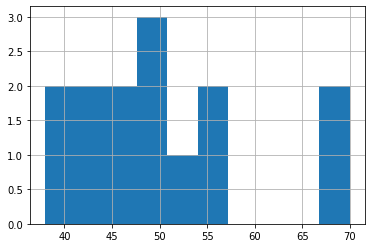

In [29]:
# df.query('(jenis_kelamin=="Male")')['berat'].hist()
df.query('(jenis_kelamin=="Female")')['berat'].hist()

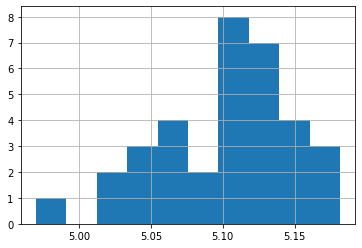

In [30]:
df['ln_height'] = df.tinggi.map(np.log)
df.ln_height.hist()

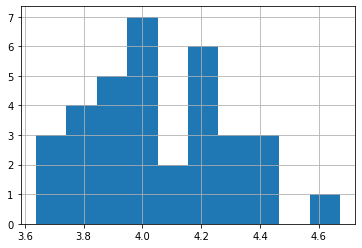

In [31]:
df['ln_weight'] = df.berat.map(np.log)
df.ln_weight.hist()

In [32]:
# pd.Series()
df.query('bmr==3602.324 or bmr==1483.896')[['jenis_kelamin','umur','berat','tinggi','bmr','hobi','multiplier']]

,jenis_kelamin,umur,berat,tinggi,bmr,hobi,multiplier
3,Male,17.8,80.0,171.0,3602.324,Futsal,1.9
24,Female,18.6,41.0,153.0,1483.896,Tidur,1.2


In [33]:
import matplotlib.pyplot as plt
age_bmr_max = [17.8+i for i in range(10,80,10)]
age_bmr_min = [18.6+i for i in range(10,80,10)]

def bmr_m(umur):
    return (66 + ( 13.7 * 80 ) + ( 5 * 171 ) - ( 6.8 * umur )) * 1.9

def bmr_f(umur):
    return  (655 + ( 9.6 * 41 ) + ( 1.8 * 153 ) - ( 4.7 * umur )) * 1.2

bmr_each_age_max = [bmr_m(i) for i in age_bmr_max]
bmr_each_age_min = [bmr_f(i) for i in age_bmr_min]

# max_df = pd.DataFrame(age_bmr_max, list(range(1,8)), columns=['age'])
# max_df['bmr'] = bmr_each_age_max

fig1 = go.Figure()

fig1.add_trace(go.Scatter(x=age_bmr_max, y=bmr_each_age_max,
                    mode='lines+markers',
                    name='lines+markers', line=dict(color='firebrick')))

fig1.update_layout(title='BMR Setiap 10 Tahun Untuk BMR Max',
                   xaxis_title='Umur',
                   yaxis_title='BMR')

iplot(fig1)



fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=age_bmr_min, y=bmr_each_age_min,
                    mode='lines+markers',
                    name='lines+markers', line=dict(color='royalblue')))


fig2.update_layout(title='BMR Setiap 10 Tahun Untuk BMR Min',
                   xaxis_title='Umur',
                   yaxis_title='BMR')
iplot(fig2)

## Distribusi Frekuensi BMI dan BMR

In [34]:
data = [go.Histogram(
    x = df['berat'],
    marker=dict(opacity= 0.6)
)]

layout = go.Layout(title="Distribusi Berat Badan",
                   xaxis=dict(title='Berat Badan (Kg)'),
                   yaxis=dict(title='Fekuensi'),
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='dist-berat')

In [35]:
trace1 = go.Histogram(
    x = df.query('jenis_kelamin=="Male"')['jenis_kelamin'],
     marker = dict(color='royalblue', opacity=0.6)
)
trace2 = go.Histogram(
    x = df.query('jenis_kelamin=="Female"')['jenis_kelamin'],
     marker = dict(color='firebrick', opacity=0.6)
)

data = [trace1, trace2]
layout = go.Layout(title="Histogram Jenis Kelamin",
                   xaxis=dict(title='Jenis Kelamin'),
                   yaxis=dict(title='Frekuensi'),
#                   margin=dict(l=0), 
#                   width=500, 
#                   height=400
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='jenis-kelamin')

In [36]:
data = [go.Histogram(
    x = df['bmi'],
    marker = dict(color='royalblue', opacity=0.6)
)]

layout = go.Layout(title="Distribusi BMI",
                   xaxis=dict(title='BMI'),
                   yaxis=dict(title='Frekuensi'),
                  )
fig1 = go.Figure(data=data, layout=layout)
iplot(fig1, filename='dist-bmi')


data = [go.Histogram(
    x = df['bmr'],
     marker = dict(color='firebrick', opacity=0.6)
)]

layout = go.Layout(title="Distribusi BMR",
                   xaxis=dict(title='BMR'),
                   yaxis=dict(title='Frekuensi'),
                  )
fig2 = go.Figure(data=data, layout=layout)
iplot(fig2, filename='dist-bmr')

In [37]:
trace1 = go.Histogram(
    x = df['berat'],
    y = df['bmi'],
    name = 'Mahasiswa',
    histfunc = 'avg',
    marker = dict(color='#1f77b4', opacity=0.6)
)
trace2 = go.Histogram(
    x = df['berat_ibu'],
    y = df['bmi'],
    name = 'Ibu Mahasiswa',
    histfunc = 'avg',
    marker = dict(color='#d62728',opacity=0.6)
)
data = [trace1, trace2]
layout = go.Layout(title='Distribusi Berat Badan Terhadap BMI',
                  xaxis=dict(title='Berat Badan'),
                   yaxis=dict(title='BMI'),
                  )
fig1 = go.Figure(data=data, layout=layout)
iplot(fig1, filename='berat-bmi')


trace1 = go.Histogram(
    x = df['berat'],
    y = df['bmr'],
    name = 'Mahasiswa',
    histfunc = 'avg',
    marker = dict(color='#1f77b4', opacity=0.6)
)
trace2 = go.Histogram(
    x = df['berat_ibu'],
    y = df['bmr'],
    name = 'Ibu Mahasiswa',
    histfunc = 'avg',
    marker = dict(color='#d62728',opacity=0.6)
)
data = [trace1, trace2]
layout = go.Layout(title='Distribusi Berat Badan Terhadap BMR',
                  xaxis=dict(title='Berat Badan'),
                   yaxis=dict(title='BMR'),
                  )
fig2 = go.Figure(data=data, layout=layout)
iplot(fig2, filename='berat-bmr')

In [38]:
trace1 = go.Histogram(
    x = df['tinggi'],
    y = df['bmi'],
    name = 'Mahasiswa',
    histfunc = 'avg',
    marker = dict(color='#1f77b4', opacity=0.6)
)
trace2 = go.Histogram(
    x = df['tinggi_ayah'],
    y = df['bmi'],
    name = 'Ayah Mahasiswa',
    histfunc = 'avg',
    marker = dict(color='#d62728',opacity=0.6)
)
data = [trace1, trace2]
layout = go.Layout(title='Distribusi Tinggi Badan Terhadap BMI',
                  xaxis=dict(title='Tinggi Badan'),
                   yaxis=dict(title='BMI'),
                  )
fig1 = go.Figure(data=data, layout=layout)
iplot(fig1, filename='tinggi-bmi')


trace1 = go.Histogram(
    x = df['tinggi'],
    y = df['bmr'],
    name = 'Mahasiswa',
    histfunc = 'avg',
    marker = dict(color='#1f77b4', opacity=0.6)
)
trace2 = go.Histogram(
    x = df['tinggi_ayah'],
    y = df['bmr'],
    name = 'Ayah Mahasiswa',
    histfunc = 'avg',
    marker = dict(color='#d62728',opacity=0.6)
)
data = [trace1, trace2]
layout = go.Layout(title='Distribusi Tinggi Badan Terhadap BMR',
                  xaxis=dict(title='Tinggi Badan'),
                   yaxis=dict(title='BMR'),
                  )
fig2 = go.Figure(data=data, layout=layout)
iplot(fig2, filename='tinggi-bmr')

In [39]:
trace1 = go.Histogram(
    x = df['berat'],
    y = df['bmi'],
    name = 'Mahasiswa',
    histfunc = 'avg',
    marker = dict( opacity=0.6)
)
data = [trace1]
layout = go.Layout(title='Distribusi Tinggi Badan Terhadap BMI',
                  xaxis=dict(title='Berat Badan'),
                   yaxis=dict(title='BMI'),
                  )
fig1 = go.Figure(data=data, layout=layout)
iplot(fig1, filename='tinggi-bmi')


trace1 = go.Histogram(
    x = df['berat'],
    y = df['bmr'],
    name = 'Mahasiswa',
    histfunc = 'avg',
    marker = dict(opacity=0.6)
)
data = [trace1]
layout = go.Layout(title='Distribusi Tinggi Badan Terhadap BMR',
                  xaxis=dict(title='Berat Badan'),
                   yaxis=dict(title='BMR'),
                  )
fig2 = go.Figure(data=data, layout=layout)
iplot(fig2, filename='tinggi-bmr')

In [40]:
trace1 = go.Histogram(
    x = df['tinggi'],
    y = df['bmi'],
    name = 'Mahasiswa',
    histfunc = 'avg',
    marker = dict(color='pink')
)
data = [trace1]
layout = go.Layout(title='Distribusi Tinggi Badan Terhadap BMI',
                  xaxis=dict(title='Tinggi Badan'),
                   yaxis=dict(title='BMI'),
                  )
fig1 = go.Figure(data=data, layout=layout)
iplot(fig1, filename='tinggi-bmi')


trace1 = go.Histogram(
    x = df['tinggi'],
    y = df['bmr'],
    name = 'Mahasiswa',
    histfunc = 'avg',
    marker = dict(color='pink')
)
data = [trace1]
layout = go.Layout(title='Distribusi Tinggi Badan Terhadap BMR',
                  xaxis=dict(title='Tinggi Badan'),
                   yaxis=dict(title='BMR'),
                  )
fig2 = go.Figure(data=data, layout=layout)
iplot(fig2, filename='tinggi-bmr')

In [42]:
fig1 = px.scatter(df, x="umur", y="bmi", color="bmi", trendline="ols",
                 size='bmi', title="Grafik Umur Mahasiswa Terhadap BMI Mahasiswa")
iplot(fig1, filename='umur-bmi')

fig2 = px.scatter(df, x="umur_ibu", y="bmi", color="bmi", trendline="ols",
                 size='bmi', title="Grafik Umur Ibu Mahasiswa Terhadap BMR Mahasiswa")
iplot(fig2, filename='umur-bmi')

fig3 = px.scatter(df, x="umur_ayah", y="bmi", color="bmi", trendline="ols",
                 size='bmi', title="Grafik Umur Ayah Mahasiswa Terhadap BMI Mahasiswa")
iplot(fig3, filename='umur-bmi2')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [43]:
fig1 = px.scatter(df, x="umur", y="bmr", color="bmr", trendline="ols",
                 size='bmr', title="Grafik Umur Mahasiswa Terhadap BMR Mahasiswa")
iplot(fig1, filename='umur-bmi')

fig2 = px.scatter(df, x="umur_ibu", y="bmr", color="bmr", trendline="ols",
                 size='bmr', title="Grafik Umur Ibu Mahasiswa Terhadap BMR Mahasiswa")
iplot(fig2, filename='umur-bmi')

fig3 = px.scatter(df, x="umur_ayah", y="bmr", color="bmr", trendline="ols",
                 size='bmr', title="Grafik Umur Ayah Mahasiswa Terhadap BMR Mahasiswa")
iplot(fig3, filename='umur-bmi')